# Lending Cub

In [2]:
# Importación de paquetes
import pandas as pd
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt

In [6]:
# Extracción de la base
df = pd.read_csv('D:/Descargas/accepted_2007_to_2018Q4.csv',sep=',')

In [7]:
#Revisamos la base
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [8]:
df.shape

(2260701, 151)

In [9]:
#revisamos nulos
numero_nulos = df.isnull().sum()
# Mostrar el resultado
numero_nulos.sort_values(ascending=False)

member_id                                     2260701
orig_projected_additional_accrued_interest    2252050
hardship_reason                               2249784
hardship_payoff_balance_amount                2249784
hardship_last_payment_amount                  2249784
payment_plan_start_date                       2249784
hardship_type                                 2249784
hardship_status                               2249784
hardship_start_date                           2249784
deferral_term                                 2249784
hardship_amount                               2249784
hardship_dpd                                  2249784
hardship_loan_status                          2249784
hardship_length                               2249784
hardship_end_date                             2249784
settlement_status                             2226455
debt_settlement_flag_date                     2226455
settlement_term                               2226455
settlement_percentage       

## Eliminación de columnas innecesarias

In [10]:
# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos = df.isna().mean() * 100

# Mostrar el resultado
porcentaje_nulos.sort_values(ascending=False)

member_id                                     100.000000
orig_projected_additional_accrued_interest     99.617331
hardship_reason                                99.517097
hardship_payoff_balance_amount                 99.517097
hardship_last_payment_amount                   99.517097
payment_plan_start_date                        99.517097
hardship_type                                  99.517097
hardship_status                                99.517097
hardship_start_date                            99.517097
deferral_term                                  99.517097
hardship_amount                                99.517097
hardship_dpd                                   99.517097
hardship_loan_status                           99.517097
hardship_length                                99.517097
hardship_end_date                              99.517097
settlement_status                              98.485160
debt_settlement_flag_date                      98.485160
settlement_term                

## Eliminación de columnas

Eliminación de columnas con más del 37% de datos vacíos

In [7]:
# El umbral sirve para setear el % que estas dispuesto a tener de datos vacíos
umbral = 0.37 

# Lista de columnas con más del 37% de valores nulos
columnas_mayor_37_nulos = [col for col in df.columns if df[col].isnull().mean() > umbral]
print("Columnas con más del 37% de valores nulos:", columnas_mayor_37_nulos)

Columnas con más del 37% de valores nulos: ['member_id', 'desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_da

In [8]:
#Eliminamos variables sin datos
df = df.drop(columns={'member_id', 'desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 
                      'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 
                      'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 
                      'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 
                      'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'revol_bal_joint', 'sec_app_fico_range_low', 
                      'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 
                      'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 
                      'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 
                      'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 
                      'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 
                      'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 
                      'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount', 'settlement_percentage', 
                      'settlement_term'})

In [9]:
# Eliminación de variables descriptivas
# Obtener el tipo de datos de cada columna
tipos_datos = df.dtypes

# Imprimir el tipo de datos de cada columna
for columna, tipo in tipos_datos.items():
    print(f"Columna '{columna}': {tipo}")


Columna 'id': object
Columna 'loan_amnt': float64
Columna 'funded_amnt': float64
Columna 'funded_amnt_inv': float64
Columna 'term': object
Columna 'int_rate': float64
Columna 'installment': float64
Columna 'grade': object
Columna 'sub_grade': object
Columna 'emp_title': object
Columna 'emp_length': object
Columna 'home_ownership': object
Columna 'annual_inc': float64
Columna 'verification_status': object
Columna 'issue_d': object
Columna 'loan_status': object
Columna 'pymnt_plan': object
Columna 'url': object
Columna 'purpose': object
Columna 'title': object
Columna 'zip_code': object
Columna 'addr_state': object
Columna 'dti': float64
Columna 'delinq_2yrs': float64
Columna 'earliest_cr_line': object
Columna 'fico_range_low': float64
Columna 'fico_range_high': float64
Columna 'inq_last_6mths': float64
Columna 'open_acc': float64
Columna 'pub_rec': float64
Columna 'revol_bal': float64
Columna 'revol_util': float64
Columna 'total_acc': float64
Columna 'initial_list_status': object
Column

Eliminación de otras columnas

In [10]:
# Eliminación de textos descriptivos
df =df.drop(columns={'title', 'id','url'})

In [11]:
# Eliminación de variables granulares
df =df.drop(columns={'sub_grade','zip_code'})

In [12]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'char

In [13]:
# Eliminación de variables que se colectan posterior a aprobaciones de crédito, por lo tanto no están disponibles previamente
df =df.drop(columns={'chargeoff_within_12_mths','collections_12_mths_ex_med','delinq_2yrs',
                     'delinq_amnt','mths_since_recent_inq','num_accts_ever_120_pd','acc_now_delinq',
                     'num_tl_120dpd_2m','num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
                     'tax_liens','pub_rec','pub_rec_bankruptcies','hardship_flag','total_pymnt',
                     'total_pymnt_inv'})

In [14]:
# Eliminación de datos con valores 0
# Lista de columnas que solo tienen valores de 0
columnas_solo_ceros = [col for col in df.columns if (df[col] == 0).all()]

print("Columnas con solo valores de 0:", columnas_solo_ceros)

Columnas con solo valores de 0: []


No hay columnas cuyos valores en su interior sean solo ceros

In [15]:
# Lista de columnas que tienen un único valor repetido
columnas_valor_unico = [col for col in df.columns if df[col].nunique() == 1]

print("Columnas con un único valor repetido:", columnas_valor_unico)

Columnas con un único valor repetido: ['policy_code']


Se eliminan del dataframe las anteriores columnas por ser solo valores únicos dentro de las columnas

In [16]:
df =df.drop(columns={'policy_code'})

In [17]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,application_type,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,debt_consolidation,PA,5.91,Aug-2003,675.0,679.0,1.0,7.0,2765.0,29.7,13.0,w,0.00,0.00,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,Individual,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,148.0,128.0,3.0,3.0,1.0,4.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,76.9,0.0,178050.0,7746.0,2400.0,13734.0,Cash,N
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,small_business,SD,16.06,Dec-1999,715.0,719.0,4.0,22.0,21470.0,19.2,38.0,w,0.00,0.00,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,Individual,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,113.0,192.0,2.0,2.0,4.0,2.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,97.4,7.7,314017.0,39475.0,79300.0,24667.0,Cash,N
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,home_improvement,IL,10.78,Aug-2000,695.0,699.0,0.0,6.0,7869.0,56.2,18.0,w,0.00,0.00,20000.00,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,Mar-2019,704.0,700.0,Joint App,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,125.0,184.0,14.0,14.0,5.0,101.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,100.0,50.0,218418.0,18696.0,6200.0,14877.0,Cash,N
3,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,debt_consolidation,NJ,17.06,Sep-2008,785.0,789.0,0.0,13.0,7802.0,11.6,17.0,w,15897.65,15897.65,19102.35,12361.66,0.0,0.0,0.0,Feb-2019,829.90,Mar-2019,679.0,675.0,Individual,0.0,301500.0,67300.0,2.0,23192.0,54962.0,12.1,36.0,87.0,2.0,2.0,1.0,2.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,100.0,0.0,381215.0,52226.0,62500.0,18000.0,Cash,N
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,major_purchase,PA,25.37,Jun-1998,695.0,699.0,3.0,12.0,21929.0,64.5,35.0,w,0.00,0.00,10400.00,1340.50,0.0,0.0,0.0,Jul-2016,10128.96,Mar-2018,704.0,700.0,Individual,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,128.0,210.0,4.0,4.0,6.0,4.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,96.6,60.0,439570.0,95768.0,20300.0,88097.0,Cash,N


In [18]:
# Otros descriptivos eliminados
df= df.drop(columns={'emp_title','purpose'})

In [19]:
# Obseramos el tamaño de la base
df.shape

(2260701, 68)

Conversión de columnas por Formato

In [20]:
df.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
addr_state                     object
dti                           float64
earliest_cr_line               object
fico_range_low                float64
fico_range_high               float64
inq_last_6mths                float64
open_acc                      float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list_status            object
out_prncp                     float64
out_prncp_in

Conversión de 'term' a númerico

In [21]:
df['term'].unique()

array([' 36 months', ' 60 months', nan], dtype=object)

In [22]:
# Eliminar espacios y la palabra "months" de la columna 'duration'
df['term'] = df['term'].str.replace(' ', '').str.replace('months', '')
df['term'].unique()

array(['36', '60', nan], dtype=object)

In [23]:
#Conversión de issue_d
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['issue_d'].dtype

dtype('<M8[ns]')

In [24]:
# Conversión a meses
df["month"] = pd.to_datetime(df['issue_d']).dt.strftime("%b")

In [ ]:
#Eliminación de issue_d debido a que una variable de tiempo no puede ser considerada dentro de los modelos de ML
df=df.drop(columns={'issue_d'})

In [26]:
df.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,application_type,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,month
0,3600.0,3600.0,3600.0,36,13.99,123.03,C,10+ years,MORTGAGE,55000.0,Not Verified,Fully Paid,n,PA,5.91,Aug-2003,675.0,679.0,1.0,7.0,2765.0,29.7,13.0,w,0.0,0.0,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,Individual,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,148.0,128.0,3.0,3.0,1.0,4.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,76.9,0.0,178050.0,7746.0,2400.0,13734.0,Cash,N,Dec
1,24700.0,24700.0,24700.0,36,11.99,820.28,C,10+ years,MORTGAGE,65000.0,Not Verified,Fully Paid,n,SD,16.06,Dec-1999,715.0,719.0,4.0,22.0,21470.0,19.2,38.0,w,0.0,0.0,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,Individual,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,113.0,192.0,2.0,2.0,4.0,2.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,97.4,7.7,314017.0,39475.0,79300.0,24667.0,Cash,N,Dec
2,20000.0,20000.0,20000.0,60,10.78,432.66,B,10+ years,MORTGAGE,63000.0,Not Verified,Fully Paid,n,IL,10.78,Aug-2000,695.0,699.0,0.0,6.0,7869.0,56.2,18.0,w,0.0,0.0,20000.0,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,Mar-2019,704.0,700.0,Joint App,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,125.0,184.0,14.0,14.0,5.0,101.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,100.0,50.0,218418.0,18696.0,6200.0,14877.0,Cash,N,Dec


## Estandarización de valores

In [27]:
# Estandarización de Home
df['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', nan, 'NONE', 'OTHER'],
      dtype=object)

In [28]:

df['home_ownership'] = df['home_ownership'].apply(lambda x: 'OTHER' if pd.isnull(x) or x == 'NONE' else x)


In [29]:
#Comprobación del ajuste de la variable
df['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'OTHER'], dtype=object)

In [30]:
# Revisión de la variable de verificación de ingresos
df['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified', nan], dtype=object)

In [31]:
df['verification_status'] = df['verification_status'].apply(lambda x: 'Verified'  if x == 'Source Verified' or pd.isnull(x) else x)

In [32]:
# Observación de los ajustes
df['verification_status'].unique()

array(['Not Verified', 'Verified'], dtype=object)

## Conversión de columas

In [33]:
# Variable de años se ajustará a una variable numérica
df['emp_length'].unique()

array(['10+ years', '3 years', '4 years', '6 years', '1 year', '7 years',
       '8 years', '5 years', '2 years', '9 years', '< 1 year', nan],
      dtype=object)

In [34]:
#Relizaremos una serie de ajustes
df['emp_length'] = df['emp_length'].str.replace(' ', '').str.replace('year', '')
df['emp_length'] = df['emp_length'].str.replace(' ', '').str.replace('years', '')
df['emp_length'] = df['emp_length'].str.replace(' ', '').str.replace('s', '')
df['emp_length'] = df['emp_length'].str.replace('10+','10')
df['emp_length'] = df['emp_length'].str.replace('<1','0')
df['emp_length'].unique()

array(['10', '3', '4', '6', '1', '7', '8', '5', '2', '9', '0', nan],
      dtype=object)

In [35]:
# Observamos las variables ajustadas
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'pymnt_plan', 'addr_state', 'dti',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
       'application_type', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_bc_

In [36]:
df.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,application_type,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,month
0,3600.0,3600.0,3600.0,36,13.99,123.03,C,10,MORTGAGE,55000.0,Not Verified,Fully Paid,n,PA,5.91,Aug-2003,675.0,679.0,1.0,7.0,2765.0,29.7,13.0,w,0.0,0.0,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,Individual,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,148.0,128.0,3.0,3.0,1.0,4.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,76.9,0.0,178050.0,7746.0,2400.0,13734.0,Cash,N,Dec
1,24700.0,24700.0,24700.0,36,11.99,820.28,C,10,MORTGAGE,65000.0,Not Verified,Fully Paid,n,SD,16.06,Dec-1999,715.0,719.0,4.0,22.0,21470.0,19.2,38.0,w,0.0,0.0,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,Individual,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,113.0,192.0,2.0,2.0,4.0,2.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,97.4,7.7,314017.0,39475.0,79300.0,24667.0,Cash,N,Dec
2,20000.0,20000.0,20000.0,60,10.78,432.66,B,10,MORTGAGE,63000.0,Not Verified,Fully Paid,n,IL,10.78,Aug-2000,695.0,699.0,0.0,6.0,7869.0,56.2,18.0,w,0.0,0.0,20000.0,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,Mar-2019,704.0,700.0,Joint App,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,125.0,184.0,14.0,14.0,5.0,101.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,100.0,50.0,218418.0,18696.0,6200.0,14877.0,Cash,N,Dec


## Segundo filtrado

In [37]:
df.shape

(2260701, 68)

In [38]:
# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos = df.isna().mean() * 100

# Mostrar el resultado
porcentaje_nulos.sort_values(ascending=False)

emp_length                    6.499754
mo_sin_old_il_acct            6.153136
bc_util                       3.366389
percent_bc_gt_75              3.335779
bc_open_to_buy                3.316140
mths_since_recent_bc          3.248771
pct_tl_nvr_dlq                3.116909
avg_cur_bal                   3.113149
mo_sin_old_rev_tl_op          3.110097
mo_sin_rcnt_rev_tl_op         3.110097
num_rev_accts                 3.110097
num_il_tl                     3.110053
num_bc_tl                     3.110053
mo_sin_rcnt_tl                3.110053
num_op_rev_tl                 3.110053
num_rev_tl_bal_gt_0           3.110053
num_actv_bc_tl                3.110053
tot_hi_cred_lim               3.110053
tot_coll_amt                  3.110053
total_il_high_credit_limit    3.110053
tot_cur_bal                   3.110053
total_rev_hi_lim              3.110053
num_actv_rev_tl               3.110053
num_sats                      2.593134
num_bc_sats                   2.593134
mort_acc                 

In [39]:
# Eliminación de duplicados
df = df.drop_duplicates()

In [40]:
# Eliminamos filas con nulos
df= df.dropna()

In [41]:
#Revisamos tamaño de la base
df.shape

(1962380, 68)

In [42]:
# Revisamos que no haya nulos
df.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
pymnt_plan                    0
addr_state                    0
dti                           0
earliest_cr_line              0
fico_range_low                0
fico_range_high               0
inq_last_6mths                0
open_acc                      0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pym

In [43]:
df.shape

(1962380, 68)

## Definición de 1 y 0 dentro de las categorías de estatus del prestamo

In [44]:
# Revisamos el sentido de los estatus
df['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default'], dtype=object)

Eliminación de status:
1. Fully paid, Considerar como 0 ya que se pagaron
2. Current, eliminar porque son prestamos que se están pagando y no representan evidencia de futuros impagos
3. Lates... vamos a considerarlos como 1
4. Default y Charged off son 1
5. In Grace: considerar como 1

In [45]:
loan_status_count = df['loan_status'].value_counts(dropna=False)
loan_status_count

loan_status
Fully Paid            927067
Current               779001
Charged Off           226392
Late (31-120 days)     18626
In Grace Period         7531
Late (16-30 days)       3731
Default                   32
Name: count, dtype: int64

# DF2

In [46]:
#Eliminaremos las variables  deseadas
estatus_deseados = {'Fully Paid','Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default'}
df2 = df[df['loan_status'].isin(estatus_deseados)]

In [47]:
# Revisión que solo quedaron dichos status
df2['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default'], dtype=object)

In [ ]:
# Observación de las variables
df2.shape

(1183379, 68)

In [ ]:
# Conteo de las variables internas
loan_status_count2 = df2['loan_status'].value_counts(dropna=False)
loan_status_count2

loan_status
Fully Paid            927067
Charged Off           226392
Late (31-120 days)     18626
In Grace Period         7531
Late (16-30 days)       3731
Default                   32
Name: count, dtype: int64

In [ ]:
#Transformación de la variable a 1 y 0
df2['objetivo'] = df2['loan_status'].apply(lambda x: 1 if x == 'Default'or x == 'Charged Off'
                                                    else 0)

In [ ]:
# Revisión del resultado
df2['objetivo'].value_counts(dropna=False)

objetivo
0    956955
1    226424
Name: count, dtype: int64

In [ ]:
# Observación de los valores únicos
df2['objetivo'].unique()

array([0, 1], dtype=int64)

## Revisión estadística

Correlación entre variables

In [ ]:
# Revisión de las columnas
df2.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'pymnt_plan', 'addr_state', 'dti',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
       'application_type', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_bc_

In [54]:
#Eliminamos la variable porque la hemos convertido en categórica para el análisis y nos quedamos solo con la que se llama objetivo
df2.drop(columns={'loan_status'},inplace=True)

## Conversión a numericos

Identificación de variables categóricos

In [55]:
df2.shape

(1183379, 68)

# DF3

In [56]:
df3= df2[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'pymnt_plan', 'addr_state', 'dti',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
       'application_type', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
       'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit',
       'disbursement_method', 'debt_settlement_flag', 'month', 'objetivo']]

In [ ]:
# Revisamos el tipo de datos que hay en el dataframe
df3.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
pymnt_plan                     object
addr_state                     object
dti                           float64
earliest_cr_line               object
fico_range_low                float64
fico_range_high               float64
inq_last_6mths                float64
open_acc                      float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list_status            object
out_prncp                     float64
out_prncp_inv                 float64
total_rec_prncp               float64
total_rec_in

In [ ]:
# Conversión a tipo de datos correcto
df3['term']=df3['term'].astype('float')

In [ ]:
# Conversión a tipo de datos correcto
df3['emp_length']=df3['emp_length'].astype('float')

In [ ]:
# Observación del dataframe
df3.shape

(1183379, 68)

### Variables categóricas

In [61]:
# Filtrar solo las columnas categóricas
df3_categoricas = df3.select_dtypes(include=['object', 'category'])

In [ ]:
# observamos las categóricas
df3_categoricas.columns

Index(['grade', 'home_ownership', 'verification_status', 'pymnt_plan',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type', 'disbursement_method',
       'debt_settlement_flag', 'month'],
      dtype='object')

In [ ]:
df3['term'].unique()

array([36., 60.])

In [64]:
# Reemplazo de la variable para 1 y 0
df3['pymnt_plan']=df3['pymnt_plan'].replace({'n':0,'y':1})
df3['pymnt_plan']=df3['pymnt_plan'].astype('float')
df3['pymnt_plan'].unique()

array([0., 1.])

In [65]:
df3.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,application_type,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,month,objetivo
0,3600.0,3600.0,3600.0,36.0,13.99,123.03,C,10.0,MORTGAGE,55000.0,Not Verified,0.0,PA,5.91,Aug-2003,675.0,679.0,1.0,7.0,2765.0,29.7,13.0,w,0.0,0.0,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,Individual,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,148.0,128.0,3.0,3.0,1.0,4.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,76.9,0.0,178050.0,7746.0,2400.0,13734.0,Cash,N,Dec,0
1,24700.0,24700.0,24700.0,36.0,11.99,820.28,C,10.0,MORTGAGE,65000.0,Not Verified,0.0,SD,16.06,Dec-1999,715.0,719.0,4.0,22.0,21470.0,19.2,38.0,w,0.0,0.0,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,Individual,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,113.0,192.0,2.0,2.0,4.0,2.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,97.4,7.7,314017.0,39475.0,79300.0,24667.0,Cash,N,Dec,0
2,20000.0,20000.0,20000.0,60.0,10.78,432.66,B,10.0,MORTGAGE,63000.0,Not Verified,0.0,IL,10.78,Aug-2000,695.0,699.0,0.0,6.0,7869.0,56.2,18.0,w,0.0,0.0,20000.0,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,Mar-2019,704.0,700.0,Joint App,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,125.0,184.0,14.0,14.0,5.0,101.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,100.0,50.0,218418.0,18696.0,6200.0,14877.0,Cash,N,Dec,0


### Variables numéricas

In [66]:
# Filtrar solo las columnas categóricas
df3_numericas = df3.select_dtypes(include=['int', 'float64'])

In [ ]:
# Observamos las variables numéricas
df3_numericas.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'pymnt_plan', 'dti',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high',
       'last_fico_range_low', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort',


### Graficar variables categoricas

In [ ]:
#renombrar las variables categoricas
cat_vars =['grade', 'home_ownership', 'verification_status', 'pymnt_plan',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type', 'disbursement_method',
       'debt_settlement_flag', 'month']

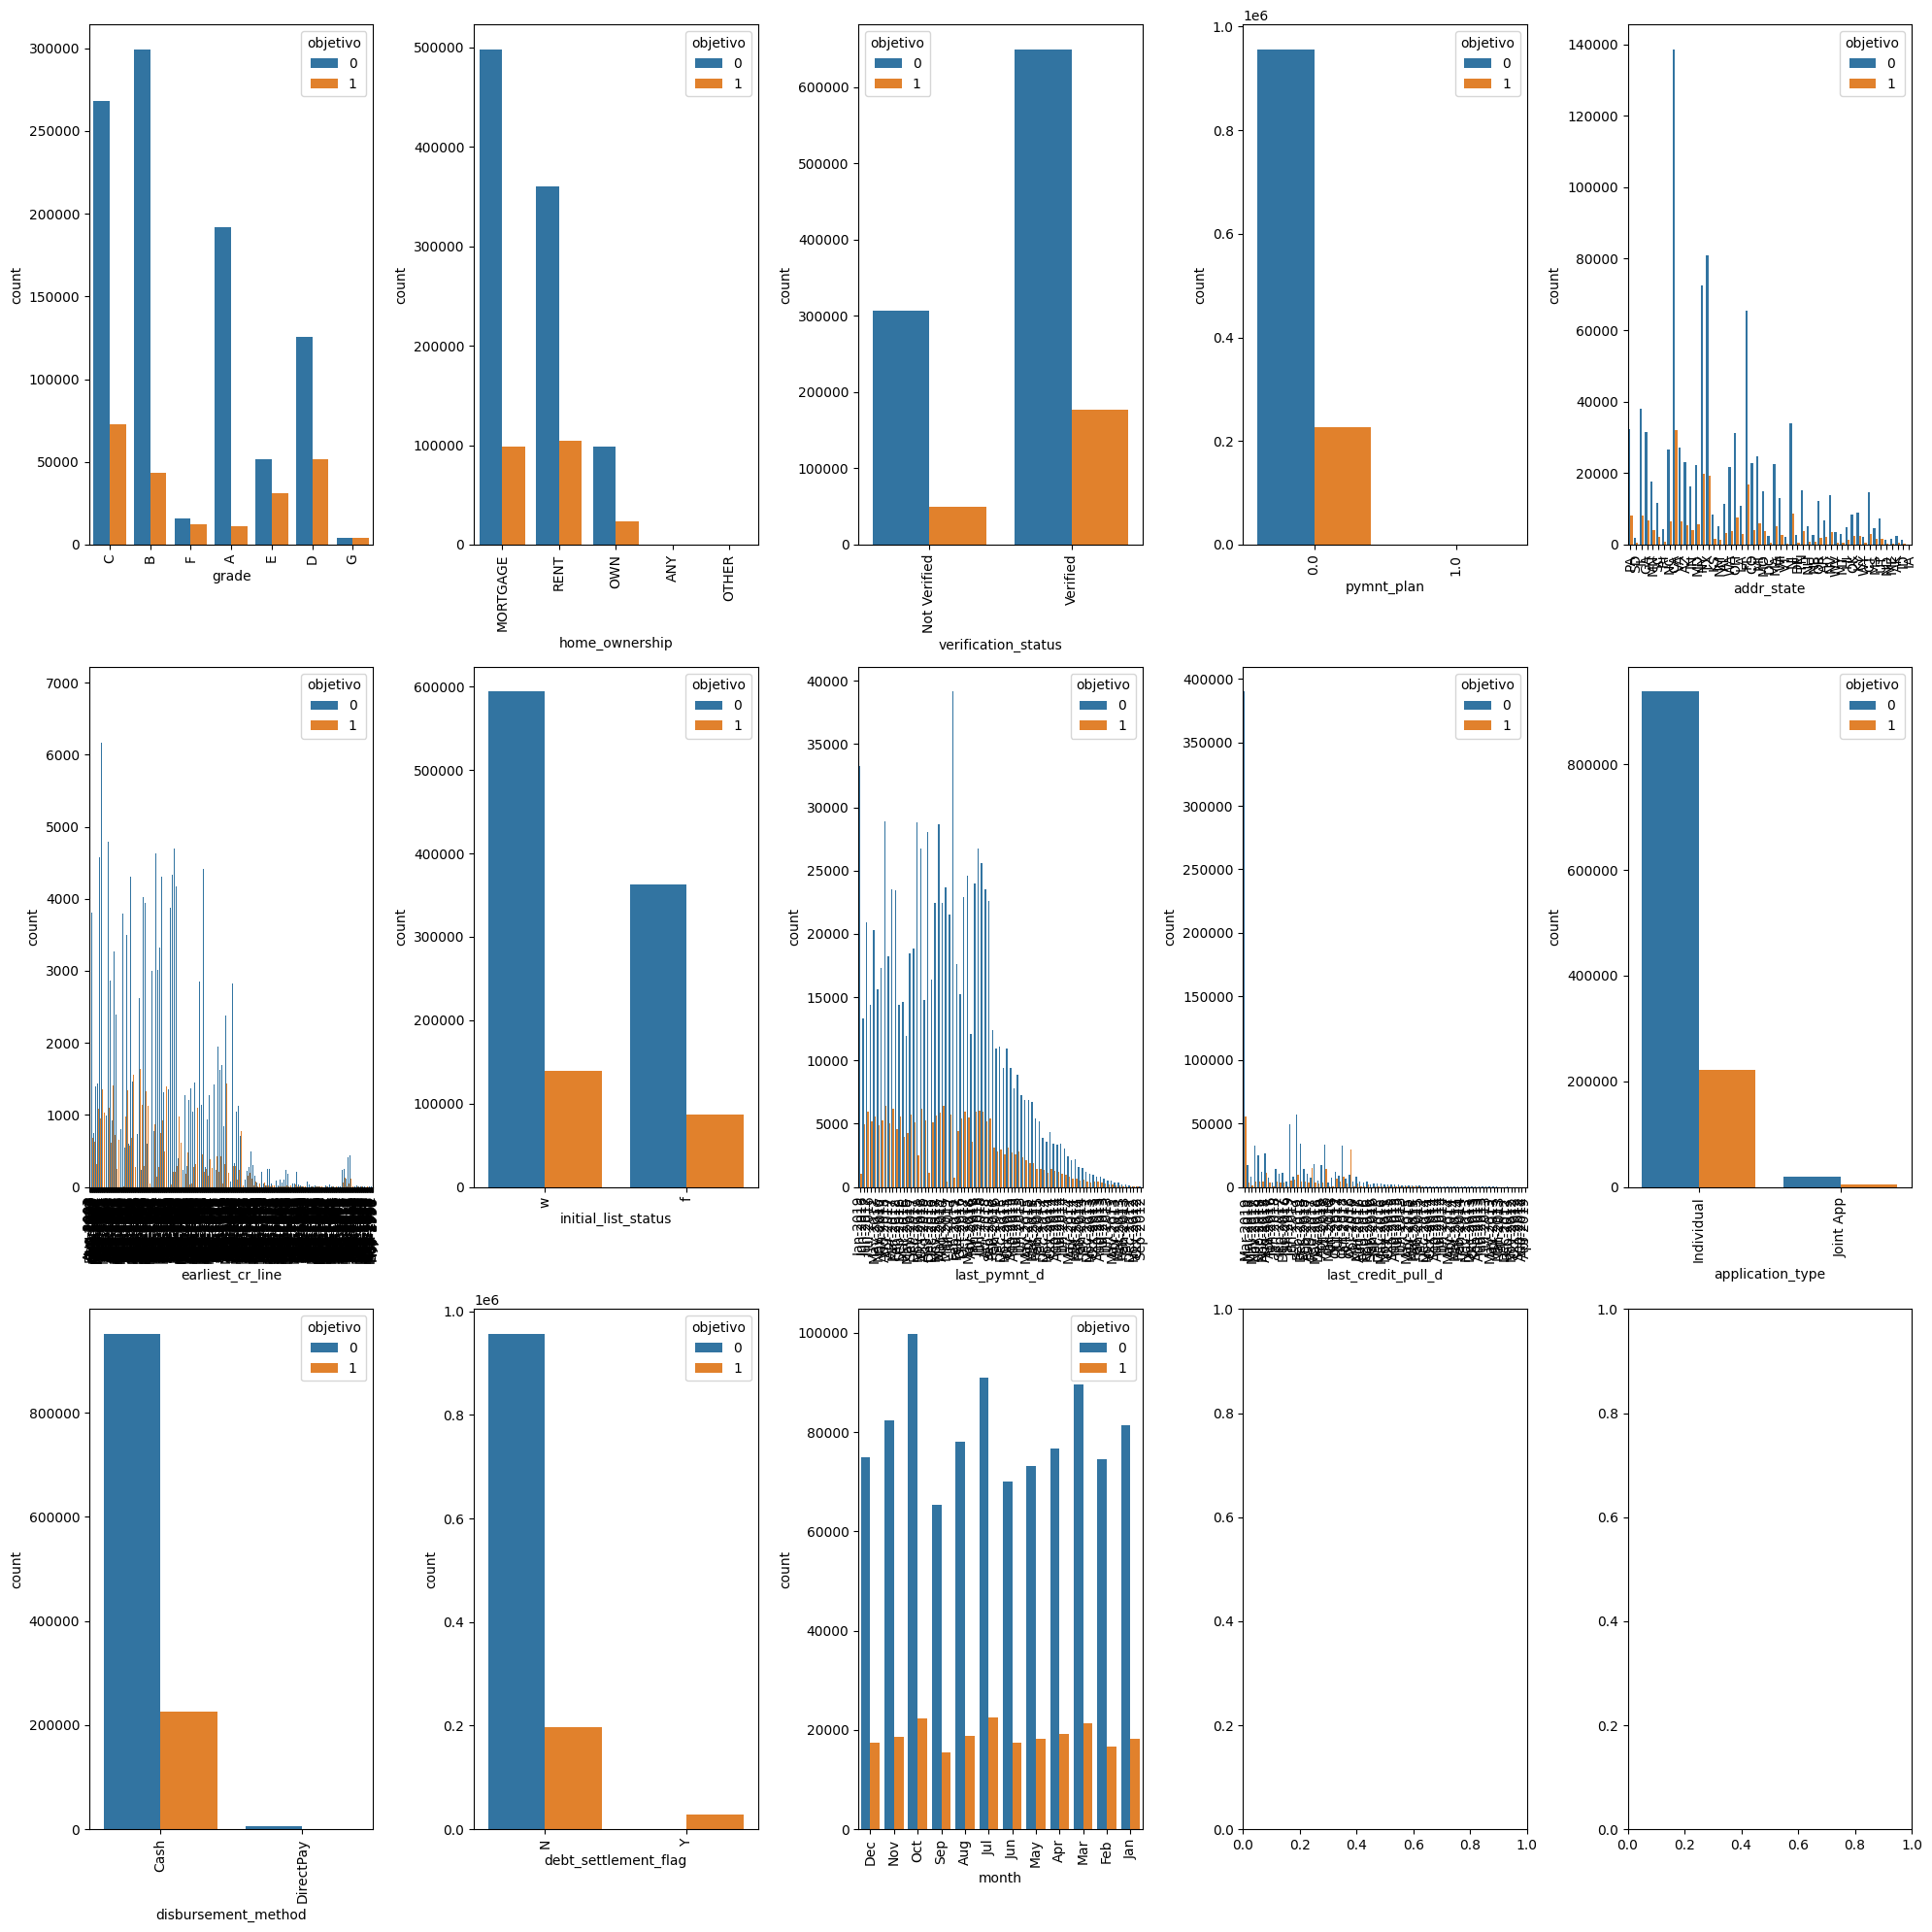

In [69]:
#Crear figuras con subplots
fig, axs = plt.subplots(nrows=3, ncols=5, figsize = (20, 20))
axs = axs.flatten()

#Crear un countplot para cada variable categorica 
for i, var in enumerate (cat_vars):
    sns.countplot(x=var, hue="objetivo", data = df3, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)
    
#Ajustar espacio entre subplots
fig.tight_layout()

#Mostrar el plot
plt.show()

In [70]:
#Eliminación de variables que no contribuyen
df3=df3.drop(columns={'disbursement_method','pymnt_plan'})

Graficar variables numéricas

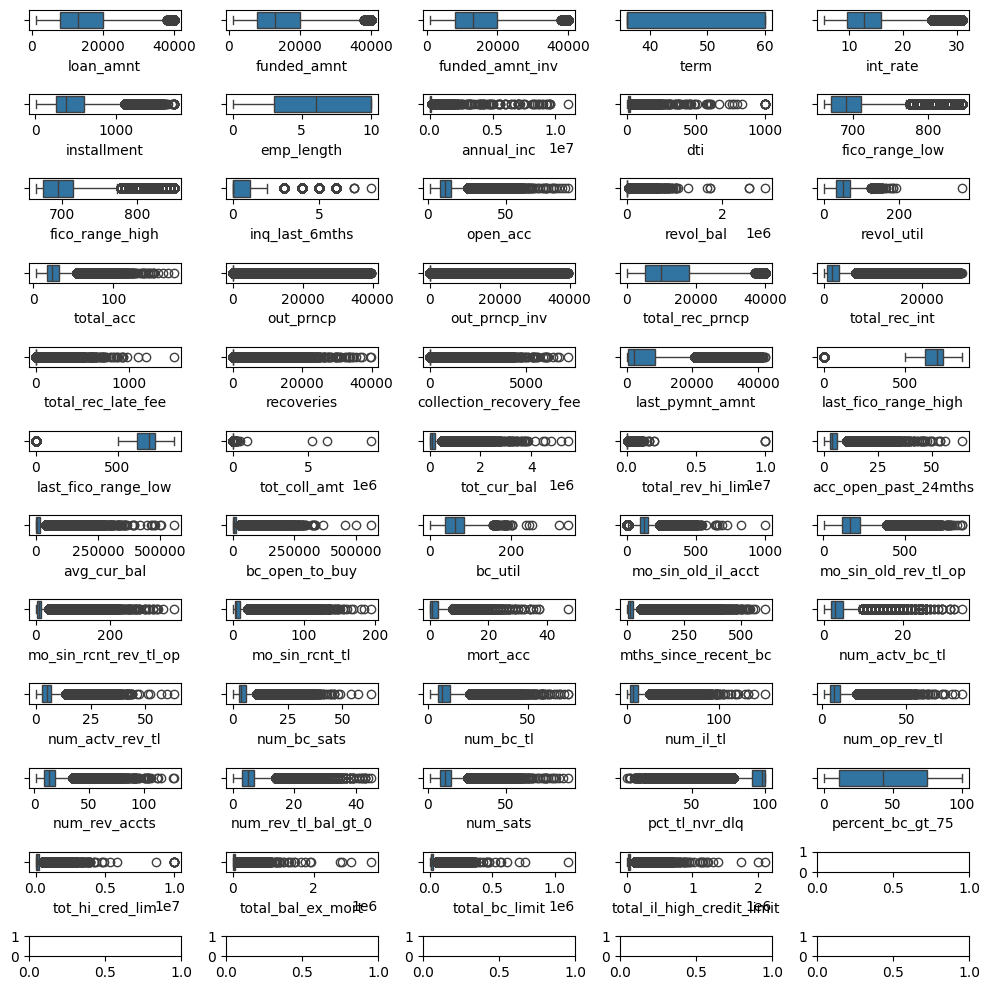

In [71]:
num_vars = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high',
       'last_fico_range_low', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort',
       'total_bc_limit', 'total_il_high_credit_limit']

fig, axs = plt.subplots(nrows=12, ncols=5, figsize=(10, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars): 
    sns.boxplot(x=var, data=df3, ax=axs[i])
    
fig.tight_layout()
    
plt.show()


## Procesamiento de datos

In [72]:
df3_categoricas.columns

Index(['grade', 'home_ownership', 'verification_status', 'pymnt_plan',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type', 'disbursement_method',
       'debt_settlement_flag', 'month'],
      dtype='object')

In [73]:
df3['grade'].unique()

array(['C', 'B', 'F', 'A', 'E', 'D', 'G'], dtype=object)

In [74]:
df3['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'OTHER'], dtype=object)

In [75]:
df3['verification_status'].unique()

array(['Not Verified', 'Verified'], dtype=object)

In [76]:
df3['addr_state'].unique()

array(['PA', 'SD', 'IL', 'GA', 'MN', 'SC', 'RI', 'NC', 'CA', 'VA', 'AZ',
       'IN', 'MD', 'NY', 'TX', 'KS', 'NM', 'AL', 'WA', 'OH', 'LA', 'FL',
       'CO', 'MI', 'MO', 'DC', 'MA', 'WI', 'VT', 'NJ', 'DE', 'TN', 'NH',
       'NE', 'OR', 'AR', 'NV', 'WV', 'MT', 'HI', 'OK', 'KY', 'WY', 'CT',
       'MS', 'UT', 'ND', 'ME', 'AK', 'ID', 'IA'], dtype=object)

In [77]:
df3['earliest_cr_line'].unique()

array(['Aug-2003', 'Dec-1999', 'Aug-2000', 'Jun-1998', 'Oct-1987',
       'Jun-1990', 'Feb-1999', 'Apr-2002', 'Nov-1994', 'Jun-1996',
       'Jun-2005', 'May-1984', 'Dec-2001', 'Nov-1993', 'Mar-2005',
       'May-2004', 'Jun-1991', 'May-2000', 'Oct-2011', 'May-1994',
       'Jul-2011', 'May-1991', 'May-2001', 'Jun-2002', 'Dec-1985',
       'Apr-2007', 'Feb-2002', 'Jun-2001', 'Oct-1996', 'Jan-2005',
       'Jul-2001', 'Aug-2004', 'Jun-2007', 'Jul-2004', 'Apr-2001',
       'May-1992', 'Oct-1999', 'Nov-2001', 'Jan-2001', 'Sep-2004',
       'Sep-2006', 'Oct-2002', 'Feb-1990', 'Aug-1987', 'Oct-1998',
       'Aug-2001', 'Feb-2004', 'Aug-2009', 'Mar-2002', 'Jan-1999',
       'Jun-2000', 'Jan-2007', 'Aug-1997', 'Feb-1996', 'Jun-2004',
       'Jun-1995', 'Oct-2004', 'Dec-2002', 'Aug-1986', 'Nov-2002',
       'Sep-2000', 'Feb-2012', 'Apr-2005', 'Sep-1994', 'Sep-2007',
       'Jan-1998', 'May-2008', 'Mar-2001', 'Apr-1994', 'Apr-2003',
       'Jan-2011', 'Nov-2000', 'May-2002', 'Nov-2003', 'Sep-20

In [78]:
df3['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [79]:
df3['last_pymnt_d'].unique()

array(['Jan-2019', 'Jun-2016', 'Jun-2017', 'Jul-2016', 'May-2017',
       'Nov-2016', 'Jan-2017', 'Aug-2018', 'Apr-2017', 'Mar-2017',
       'Feb-2018', 'Sep-2016', 'Mar-2016', 'May-2016', 'Sep-2017',
       'Dec-2017', 'Nov-2018', 'Oct-2018', 'Aug-2016', 'Dec-2018',
       'Dec-2016', 'Nov-2017', 'Mar-2018', 'Aug-2017', 'Mar-2019',
       'Jul-2017', 'Feb-2019', 'Feb-2017', 'Oct-2016', 'Oct-2017',
       'May-2018', 'Apr-2016', 'Jan-2018', 'Jul-2018', 'Jun-2018',
       'Apr-2018', 'Sep-2018', 'Feb-2016', 'Jan-2016', 'Dec-2015',
       'Nov-2015', 'Oct-2015', 'Sep-2015', 'Aug-2015', 'Jul-2015',
       'Jun-2015', 'May-2015', 'Apr-2015', 'Mar-2015', 'Feb-2015',
       'Jan-2015', 'Dec-2014', 'Nov-2014', 'Oct-2014', 'Sep-2014',
       'Aug-2014', 'Jul-2014', 'Jun-2014', 'May-2014', 'Apr-2014',
       'Mar-2014', 'Feb-2014', 'Jan-2014', 'Dec-2013', 'Nov-2013',
       'Oct-2013', 'Sep-2013', 'Aug-2013', 'Jul-2013', 'Jun-2013',
       'May-2013', 'Apr-2013', 'Mar-2013', 'Feb-2013', 'Jan-20

In [80]:
df3[ 'last_credit_pull_d'].unique()

array(['Mar-2019', 'Mar-2018', 'May-2017', 'Nov-2018', 'Sep-2018',
       'Nov-2017', 'Aug-2018', 'Apr-2017', 'Jun-2016', 'Jan-2018',
       'Sep-2017', 'Dec-2017', 'Jul-2016', 'Jan-2019', 'Jun-2017',
       'Feb-2019', 'Dec-2018', 'Feb-2018', 'Aug-2017', 'Feb-2017',
       'May-2018', 'Dec-2016', 'Apr-2018', 'Jul-2018', 'Mar-2016',
       'Jun-2018', 'Oct-2017', 'Jul-2017', 'Oct-2018', 'Jan-2017',
       'Oct-2016', 'Apr-2016', 'Mar-2017', 'Aug-2016', 'Feb-2016',
       'Nov-2016', 'Sep-2016', 'Jan-2016', 'Dec-2015', 'May-2016',
       'Nov-2015', 'Oct-2015', 'Sep-2015', 'Aug-2015', 'Jul-2015',
       'Jun-2015', 'May-2015', 'Apr-2015', 'Mar-2015', 'Feb-2015',
       'Jan-2015', 'Dec-2014', 'Nov-2014', 'Oct-2014', 'Sep-2014',
       'Aug-2014', 'Jul-2014', 'Jun-2014', 'May-2014', 'Apr-2014',
       'Mar-2014', 'Feb-2014', 'Jan-2014', 'Nov-2013', 'Dec-2013',
       'Oct-2013', 'Sep-2013', 'Aug-2013', 'Jun-2013', 'Jul-2013',
       'May-2013', 'Apr-2013', 'Mar-2013', 'Jan-2013', 'Dec-20

In [81]:
df3[ 'application_type'].unique()

array(['Individual', 'Joint App'], dtype=object)

In [82]:
df3['debt_settlement_flag'].unique()

array(['N', 'Y'], dtype=object)

In [83]:
df3['month'].unique()

array(['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr',
       'Mar', 'Feb', 'Jan'], dtype=object)

### Transformar datos

In [84]:
#Observamos las variables del dataframe
df3_categoricas.columns

Index(['grade', 'home_ownership', 'verification_status', 'pymnt_plan',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type', 'disbursement_method',
       'debt_settlement_flag', 'month'],
      dtype='object')

In [85]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df3['grade']= label_encoder.fit_transform(df3['grade'])
df3['grade'].unique()

array([2, 1, 5, 0, 4, 3, 6])

In [86]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df3['home_ownership']= label_encoder.fit_transform(df3['home_ownership'])
df3['home_ownership'].unique()

array([1, 4, 3, 0, 2])

In [87]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df3['verification_status']= label_encoder.fit_transform(df3['verification_status'])
df3['verification_status'].unique()

array([0, 1])

In [163]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df3['addr_state']= label_encoder.fit_transform(df3['addr_state'])
df3['addr_state'].unique()

array([38, 41, 14, 10, 23, 40, 39, 27,  4, 45,  3, 15, 20, 34, 43, 16, 32,
        1, 47, 35, 18,  9,  5, 22, 24,  7, 19, 48, 46, 31,  8, 42, 30, 29,
       37,  2, 33, 49, 26, 11, 36, 17, 50,  6, 25, 44, 28, 21,  0, 13, 12],
      dtype=int64)

In [89]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df3['earliest_cr_line']= label_encoder.fit_transform(df3['earliest_cr_line'])
df3['earliest_cr_line'].unique()

array([105, 160, 102, 402, 634, 394, 217,  44, 582, 400, 409, 509, 162,
       581, 470, 529, 395, 525, 658, 519, 354, 516, 526, 406, 146,  49,
       220, 405, 643, 289, 344, 106, 411, 347,  43, 517, 646, 589, 285,
       710, 712, 649, 208,  89, 645, 103, 222, 111, 467, 283, 404, 291,
        99, 214, 408, 399, 651, 163,  88, 590, 706, 230,  47, 700, 713,
       282, 533, 466,  36,  45, 295, 588, 527, 591, 709, 110, 158, 531,
       597, 641, 510, 708, 403, 594, 286, 584, 218, 241, 410, 228, 144,
       469, 100, 167, 579,  48, 655, 592, 213, 638, 689, 292, 338,  91,
       647, 593, 161, 401, 695, 523, 113, 690, 650, 537, 288, 385, 587,
       170, 341, 337, 716, 465, 573, 696, 462, 518, 390, 640,  34, 104,
       474, 715, 138, 346,  46,  98, 270, 223,  25, 514, 339, 461, 524,
       219, 528, 693,  33, 571, 477, 343,  31, 575, 166, 226, 626, 534,
       109, 168,  30, 350, 281, 101, 205, 387,  86, 521, 701, 280, 642,
       164,  22, 327,  53, 572, 216, 468, 396, 654, 348,  97, 21

In [90]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df3['initial_list_status']= label_encoder.fit_transform(df3['initial_list_status'])
df3['initial_list_status'].unique()

array([1, 0])

In [91]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df3['last_pymnt_d']= label_encoder.fit_transform(df3['last_pymnt_d'])
df3['last_pymnt_d'].unique()

array([32, 42, 43, 36, 56, 62, 30, 11,  4, 49, 24, 76, 48, 55, 77, 17, 64,
       71,  9, 18, 16, 63, 50, 10, 51, 37, 25, 23, 69, 70, 57,  3, 31, 38,
       44,  5, 78, 22, 29, 15, 61, 68, 75,  8, 35, 41, 54,  2, 47, 21, 28,
       14, 60, 67, 74,  7, 34, 40, 53,  1, 46, 20, 27, 13, 59, 66, 73,  6,
       33, 39, 52,  0, 45, 19, 26, 12, 58, 65, 72])

In [92]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df3['last_credit_pull_d']= label_encoder.fit_transform(df3['last_credit_pull_d'])
df3['last_credit_pull_d'].unique()

array([53, 52, 58, 66, 80, 65, 13,  4, 44, 33, 79, 19, 38, 34, 45, 27, 20,
       26, 12, 25, 59, 18,  5, 40, 50, 46, 72, 39, 73, 32, 71,  3, 51, 11,
       24, 64, 78, 31, 17, 57, 63, 70, 77, 10, 37, 43, 56,  2, 49, 23, 30,
       16, 62, 69, 76,  9, 36, 42, 55,  1, 48, 22, 29, 61, 15, 68, 75,  8,
       41, 35, 54,  0, 47, 28, 14, 21, 60, 67, 74,  7,  6])

In [93]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df3['application_type']= label_encoder.fit_transform(df3['application_type'])
df3['application_type'].unique()

array([0, 1])

In [94]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df3['debt_settlement_flag']= label_encoder.fit_transform(df3['debt_settlement_flag'])
df3['debt_settlement_flag'].unique()

array([0, 1])

In [95]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df3['month']= label_encoder.fit_transform(df3['month'])
df3['month'].unique()

array([ 2,  9, 10, 11,  1,  5,  6,  8,  0,  7,  3,  4])

In [96]:
df3.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                          float64
int_rate                      float64
installment                   float64
grade                           int32
emp_length                    float64
home_ownership                  int32
annual_inc                    float64
verification_status             int32
addr_state                      int32
dti                           float64
earliest_cr_line                int32
fico_range_low                float64
fico_range_high               float64
inq_last_6mths                float64
open_acc                      float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list_status             int32
out_prncp                     float64
out_prncp_inv                 float64
total_rec_prncp               float64
total_rec_int                 float64
total_rec_la

In [97]:
df3.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,application_type,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,month,objetivo
0,3600.0,3600.0,3600.0,36.0,13.99,123.03,2,10.0,1,55000.0,0,38,5.91,105,675.0,679.0,1.0,7.0,2765.0,29.7,13.0,1,0.0,0.0,3600.0,821.72,0.0,0.0,0.0,32,122.67,53,564.0,560.0,0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,148.0,128.0,3.0,3.0,1.0,4.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,76.9,0.0,178050.0,7746.0,2400.0,13734.0,0,2,0
1,24700.0,24700.0,24700.0,36.0,11.99,820.28,2,10.0,1,65000.0,0,41,16.06,160,715.0,719.0,4.0,22.0,21470.0,19.2,38.0,1,0.0,0.0,24700.0,979.66,0.0,0.0,0.0,42,926.35,53,699.0,695.0,0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,113.0,192.0,2.0,2.0,4.0,2.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,97.4,7.7,314017.0,39475.0,79300.0,24667.0,0,2,0
2,20000.0,20000.0,20000.0,60.0,10.78,432.66,1,10.0,1,63000.0,0,14,10.78,102,695.0,699.0,0.0,6.0,7869.0,56.2,18.0,1,0.0,0.0,20000.0,2705.92,0.0,0.0,0.0,43,15813.30,53,704.0,700.0,1,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,125.0,184.0,14.0,14.0,5.0,101.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,100.0,50.0,218418.0,18696.0,6200.0,14877.0,0,2,0


<Axes: >

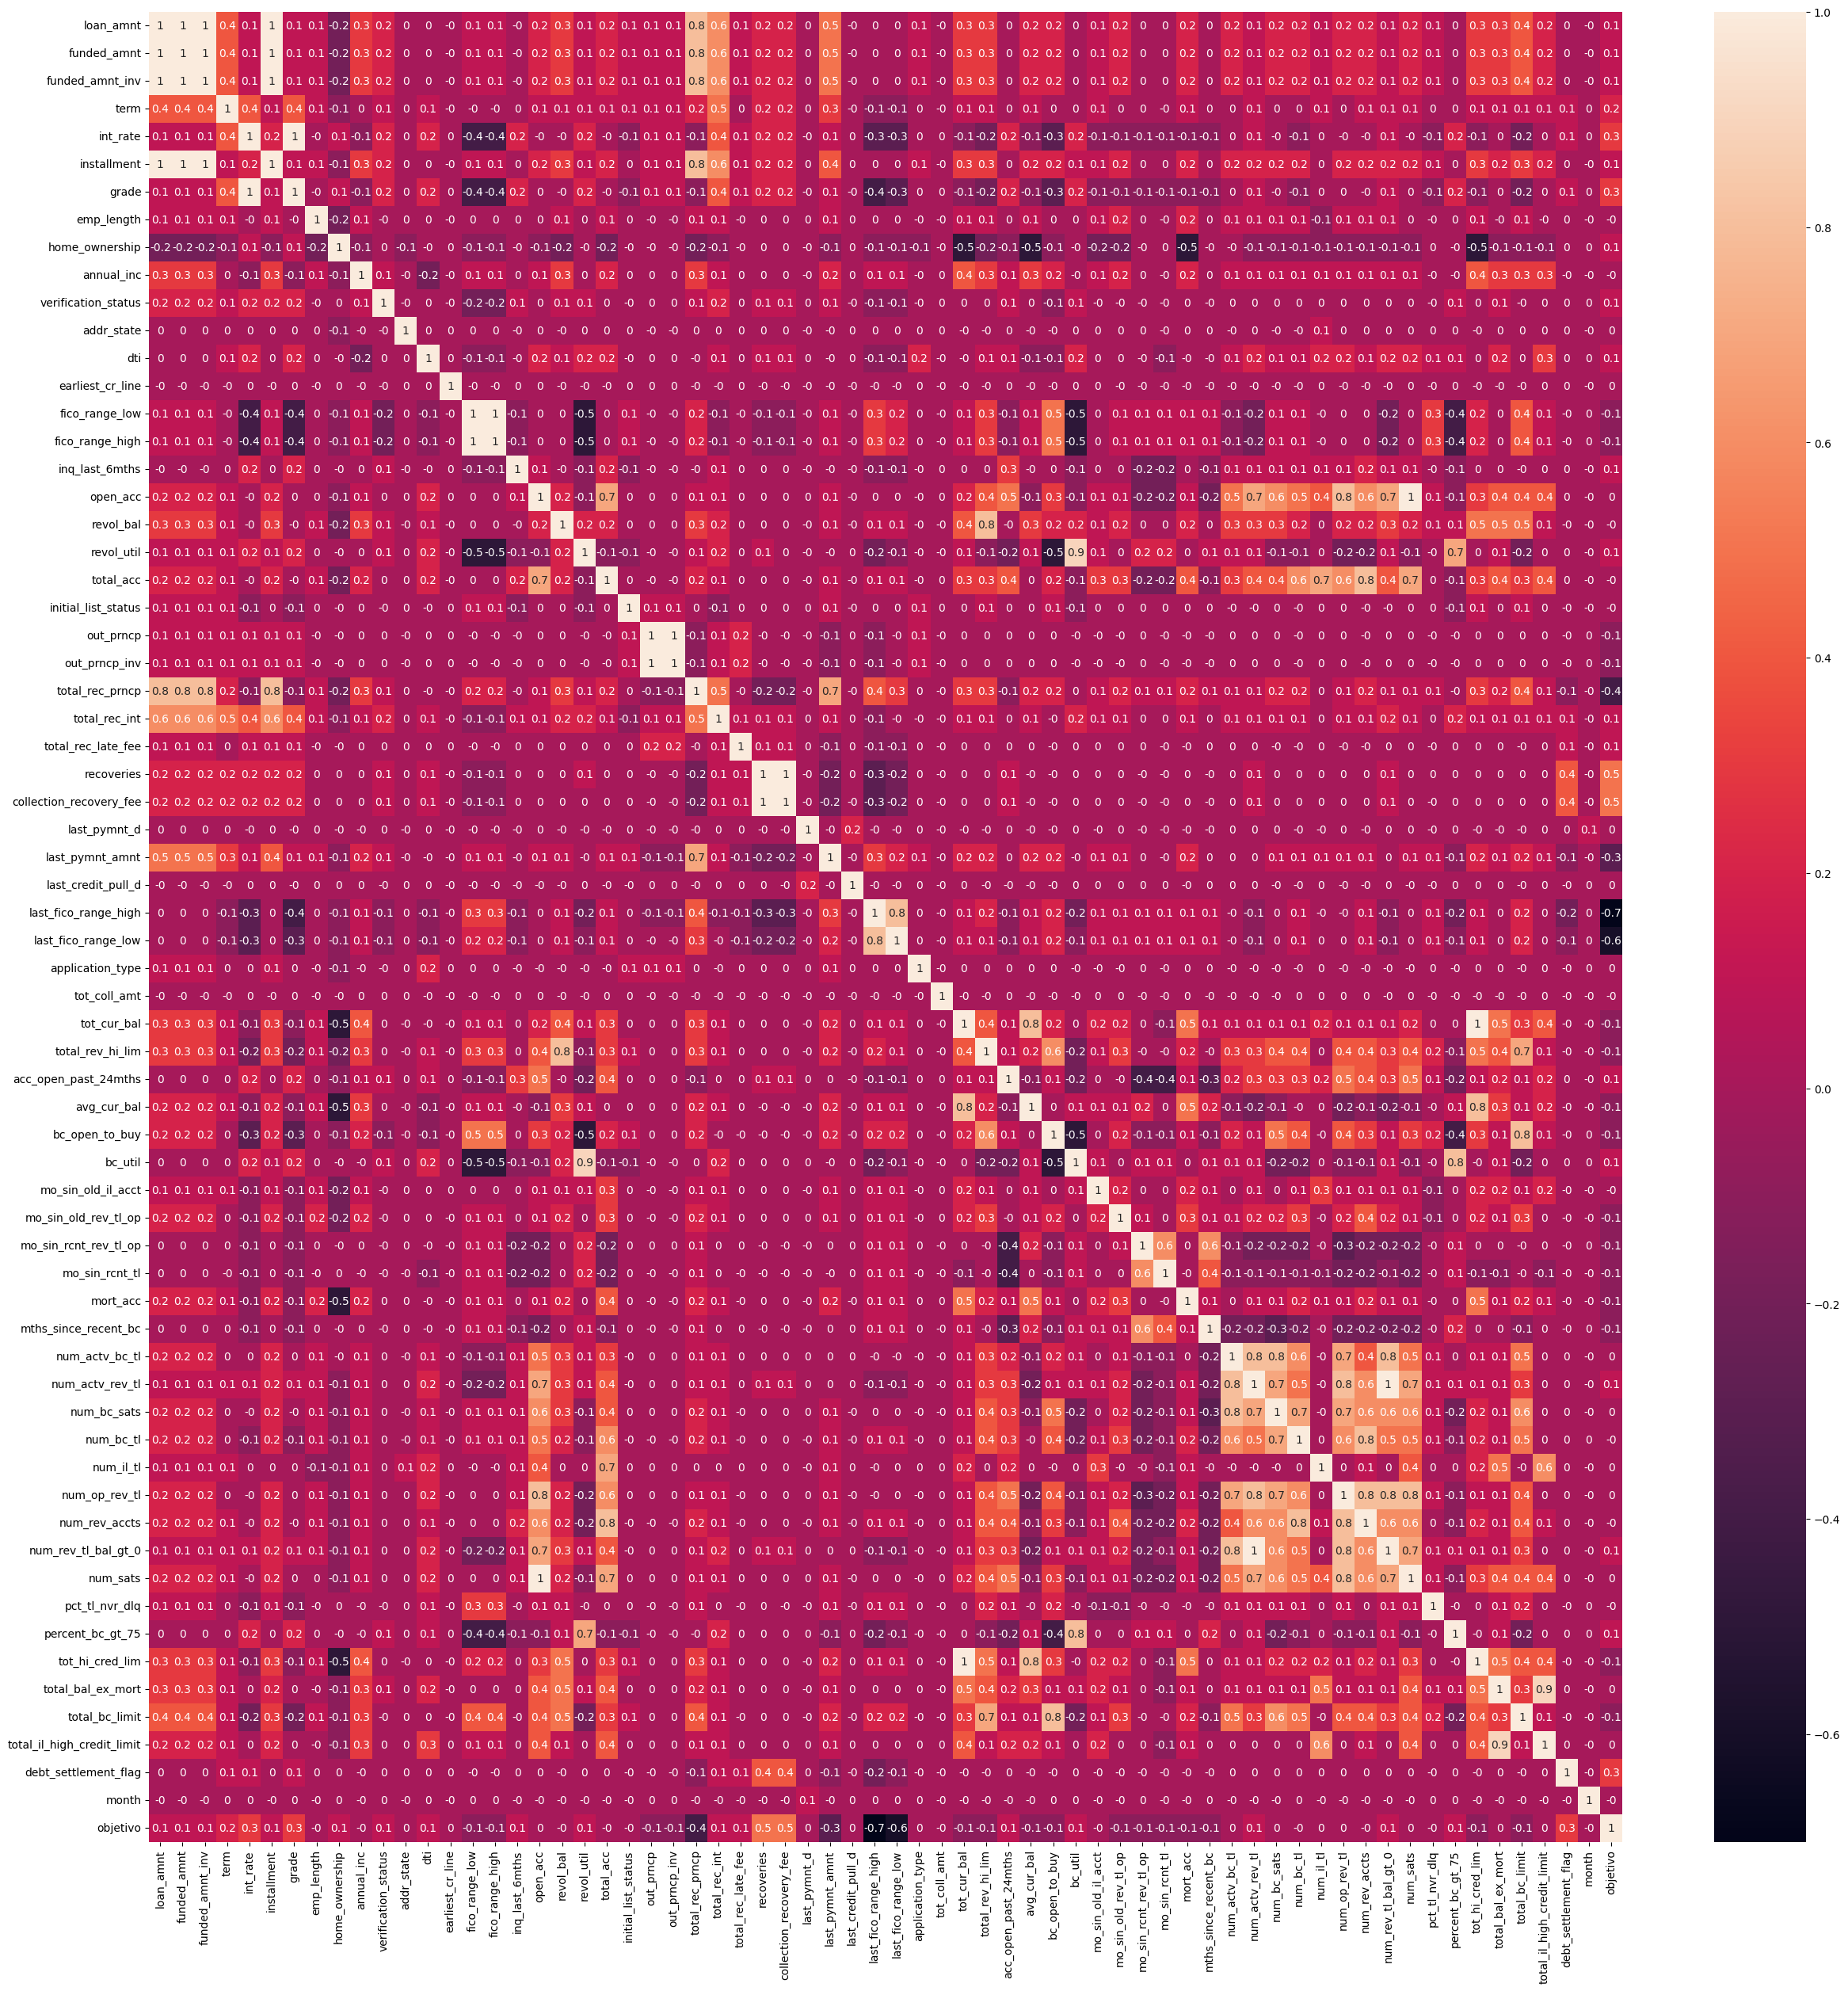

In [98]:
plt.figure(figsize=(30, 30))
sns.heatmap(df3.corr().round(1), fmt='.2g', annot=True)

In [99]:
df3.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'addr_state', 'dti', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low', 'application_type',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_t

Voy a Seleccionar un conjunto de variables para usar dentro del modelo

In [100]:
#eliminaré la variable 'installment' por estar altamente correlacionada
df3 = df3.drop(columns={'loan_amnt', 'funded_amnt', 'funded_amnt_inv',})

In [101]:
df3 = df3.drop(columns={'grade'})

In [102]:
df3 = df3.drop(columns={'total_rec_prncp'})

In [103]:
#eliminaré la variable 'hardship_flag' por estar altamente correlacionada
df3 = df3.drop(columns={'fico_range_low','num_sats'})

In [104]:
df3 = df3.drop(columns={'bc_util'})

In [105]:
df3 = df3.drop(columns={'out_prncp_inv','collection_recovery_fee','last_fico_range_low','tot_cur_bal','total_rev_hi_lim','bc_open_to_buy'})

In [106]:
df3 = df3.drop(columns={'total_bal_ex_mort','num_rev_accts','num_op_rev_tl','num_actv_rev_tl','num_actv_bc_tl'})

In [107]:
df3 = df3.drop(columns={'avg_cur_bal'})

In [108]:
#revisamos que installment se fue
df3.columns

Index(['term', 'int_rate', 'installment', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'addr_state', 'dti',
       'earliest_cr_line', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'application_type', 'tot_coll_amt',
       'acc_open_past_24mths', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_recent_bc', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
       'num_rev_tl_bal_gt_0', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'tot_hi_cred_lim', 'total_bc_limit', 'total_il_high_credit_limit',
       'debt_settlement_flag', 'month', 'objetivo'],
      dtype='object')

## Balancer etiquetas
"Y" Label

Insertar un gráfico de barras para mostrar los conteos de observaciones en cada categeria usando barras.

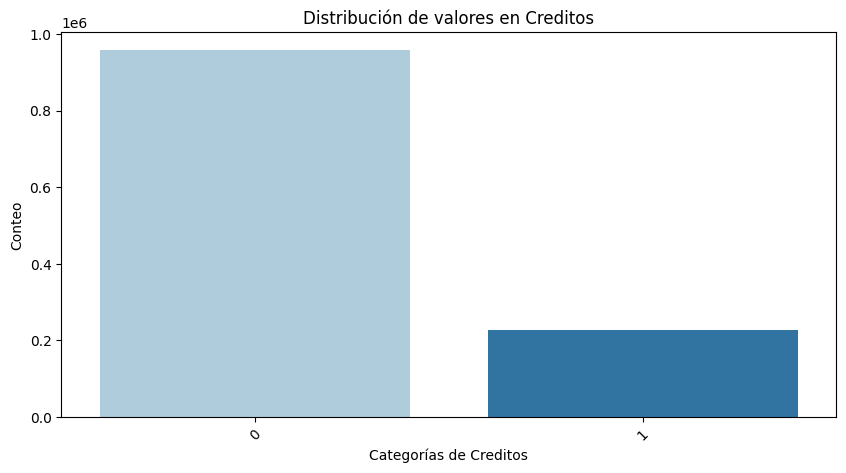

In [109]:
plt.figure(figsize=(10, 5))  # Ajusta el tamaño del gráfico para mejor visualización
sns.countplot(x='objetivo', data=df3, palette='Paired')  # Usando la paleta 'Paired' para colores distintos
plt.title('Distribución de valores en Creditos')  # Agrega un título al gráfico
plt.xlabel('Categorías de Creditos')  # Etiqueta para el eje x
plt.ylabel('Conteo')  # Etiqueta para el eje y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visualización
plt.show()

In [110]:
# Observamos el conteo de las variable
df3['objetivo'].value_counts()

objetivo
0    956955
1    226424
Name: count, dtype: int64

## Usar función resample

In [111]:
df3.head(3)

,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,addr_state,dti,earliest_cr_line,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,application_type,tot_coll_amt,acc_open_past_24mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_bc_sats,num_bc_tl,num_il_tl,num_rev_tl_bal_gt_0,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,month,objetivo
0,36.0,13.99,123.03,10.0,1,55000.0,0,38,5.91,105,679.0,1.0,7.0,2765.0,29.7,13.0,1,0.0,821.72,0.0,0.0,32,122.67,53,564.0,0,722.0,4.0,148.0,128.0,3.0,3.0,1.0,4.0,2.0,5.0,3.0,4.0,76.9,0.0,178050.0,2400.0,13734.0,0,2,0
1,36.0,11.99,820.28,10.0,1,65000.0,0,41,16.06,160,719.0,4.0,22.0,21470.0,19.2,38.0,1,0.0,979.66,0.0,0.0,42,926.35,53,699.0,0,0.0,4.0,113.0,192.0,2.0,2.0,4.0,2.0,13.0,17.0,6.0,5.0,97.4,7.7,314017.0,79300.0,24667.0,0,2,0
2,60.0,10.78,432.66,10.0,1,63000.0,0,14,10.78,102,699.0,0.0,6.0,7869.0,56.2,18.0,1,0.0,2705.92,0.0,0.0,43,15813.30,53,704.0,1,0.0,6.0,125.0,184.0,14.0,14.0,5.0,101.0,2.0,4.0,6.0,3.0,100.0,50.0,218418.0,6200.0,14877.0,0,2,0


In [112]:
from sklearn.utils import resample
#Crear dos diferentes dataframe de una clase mayoritaria y minoritaria
df_majority = df3[(df3['objetivo']==0)] 
df_minority = df3[(df3['objetivo']==1)] 

# muestreo ascendente de la clase minoritaria
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # muesta con reemplazo 
                                 n_samples= 956955, # para que coincida con la clase mayoritaria
                                 random_state=0)   # resultados reproducible

# Combinar la clase mayoritaria con la muestra ascendente de la clase minoritaria 
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [113]:
df_upsampled.head(3)

,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,addr_state,dti,earliest_cr_line,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,application_type,tot_coll_amt,acc_open_past_24mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_bc_sats,num_bc_tl,num_il_tl,num_rev_tl_bal_gt_0,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,month,objetivo
1974483,36.0,17.99,516.91,10.0,4,42240.0,0,19,31.68,694,704.0,0.0,24.0,10324.0,22.2,37.0,1,0.0,2692.83,0.0,1287.02,63,516.91,59,694.0,0,0.0,11.0,128.0,335.0,5.0,5.0,3.0,9.0,5.0,7.0,8.0,8.0,100.0,20.0,75573.0,22800.0,29173.0,0,1,1
276136,36.0,10.99,163.67,3.0,4,30000.0,0,9,10.10,655,689.0,0.0,11.0,3497.0,35.0,13.0,0,0.0,734.76,15.0,0.00,4,833.35,27,499.0,0,0.0,2.0,79.0,60.0,4.0,4.0,0.0,4.0,4.0,5.0,6.0,4.0,76.9,0.0,27246.0,9200.0,16997.0,0,8,1
1761424,60.0,17.57,377.41,10.0,1,90000.0,1,4,23.04,585,674.0,1.0,20.0,14980.0,74.2,29.0,0,0.0,2473.61,0.0,1865.31,14,377.41,71,594.0,0,0.0,8.0,140.0,193.0,1.0,1.0,2.0,24.0,11.0,12.0,9.0,14.0,100.0,100.0,462359.0,14600.0,62046.0,0,2,1


In [114]:
# Verificamos que el resample se haya realizado correctamente
df_upsampled['objetivo'].value_counts()

objetivo
1    956955
0    956955
Name: count, dtype: int64

## OutLiers
#### Eliminar outliers usando IQR

In [115]:
# Filtrar solo las columnas categóricas
num_vars = df_upsampled.select_dtypes(include=['int', 'float64'])

In [116]:
num_vars.columns

Index(['term', 'int_rate', 'installment', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'addr_state', 'dti',
       'earliest_cr_line', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'application_type', 'tot_coll_amt',
       'acc_open_past_24mths', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_recent_bc', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
       'num_rev_tl_bal_gt_0', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'tot_hi_cred_lim', 'total_bc_limit', 'total_il_high_credit_limit',
       'debt_settlement_flag', 'month', 'objetivo'],
      dtype='object')

In [117]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Señale las columnas para remover los outliers
columns_to_check = ['int_rate','installment','annual_inc','dti'] # solo estamos considerando los loan_amnt

# Solicitar la función que remueve los outliers usando IQR
df_clean = remove_outliers_iqr(df_upsampled, columns_to_check)

# Mostrar el resultado en el dataframe
df_clean.head()

,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,addr_state,dti,earliest_cr_line,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,application_type,tot_coll_amt,acc_open_past_24mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_bc_sats,num_bc_tl,num_il_tl,num_rev_tl_bal_gt_0,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,month,objetivo
1974483,36.0,17.99,516.91,10.0,4,42240.0,0,19,31.68,694,704.0,0.0,24.0,10324.0,22.2,37.0,1,0.0,2692.83,0.0,1287.02,63,516.91,59,694.0,0,0.0,11.0,128.0,335.0,5.0,5.0,3.0,9.0,5.0,7.0,8.0,8.0,100.0,20.0,75573.0,22800.0,29173.0,0,1,1
276136,36.0,10.99,163.67,3.0,4,30000.0,0,9,10.10,655,689.0,0.0,11.0,3497.0,35.0,13.0,0,0.0,734.76,15.0,0.00,4,833.35,27,499.0,0,0.0,2.0,79.0,60.0,4.0,4.0,0.0,4.0,4.0,5.0,6.0,4.0,76.9,0.0,27246.0,9200.0,16997.0,0,8,1
1761424,60.0,17.57,377.41,10.0,1,90000.0,1,4,23.04,585,674.0,1.0,20.0,14980.0,74.2,29.0,0,0.0,2473.61,0.0,1865.31,14,377.41,71,594.0,0,0.0,8.0,140.0,193.0,1.0,1.0,2.0,24.0,11.0,12.0,9.0,14.0,100.0,100.0,462359.0,14600.0,62046.0,0,2,1
1079642,36.0,11.99,664.20,4.0,4,65000.0,1,43,27.22,285,669.0,1.0,10.0,7848.0,76.0,22.0,0,0.0,3033.30,0.0,776.00,70,664.20,53,649.0,0,0.0,8.0,180.0,179.0,18.0,18.0,0.0,18.0,5.0,5.0,11.0,4.0,95.0,33.3,55719.0,9350.0,45419.0,1,3,1
1785771,60.0,10.99,434.75,10.0,1,62000.0,1,23,25.43,400,724.0,1.0,16.0,33889.0,32.2,40.0,1,0.0,1064.01,0.0,0.00,1,434.75,25,644.0,0,0.0,6.0,211.0,183.0,10.0,10.0,4.0,16.0,8.0,14.0,9.0,9.0,100.0,12.5,341837.0,79400.0,32437.0,0,10,1


In [118]:
df_clean.shape

(1744487, 46)

In [119]:
df_clean.head(3)

,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,addr_state,dti,earliest_cr_line,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,application_type,tot_coll_amt,acc_open_past_24mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_bc_sats,num_bc_tl,num_il_tl,num_rev_tl_bal_gt_0,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,month,objetivo
1974483,36.0,17.99,516.91,10.0,4,42240.0,0,19,31.68,694,704.0,0.0,24.0,10324.0,22.2,37.0,1,0.0,2692.83,0.0,1287.02,63,516.91,59,694.0,0,0.0,11.0,128.0,335.0,5.0,5.0,3.0,9.0,5.0,7.0,8.0,8.0,100.0,20.0,75573.0,22800.0,29173.0,0,1,1
276136,36.0,10.99,163.67,3.0,4,30000.0,0,9,10.10,655,689.0,0.0,11.0,3497.0,35.0,13.0,0,0.0,734.76,15.0,0.00,4,833.35,27,499.0,0,0.0,2.0,79.0,60.0,4.0,4.0,0.0,4.0,4.0,5.0,6.0,4.0,76.9,0.0,27246.0,9200.0,16997.0,0,8,1
1761424,60.0,17.57,377.41,10.0,1,90000.0,1,4,23.04,585,674.0,1.0,20.0,14980.0,74.2,29.0,0,0.0,2473.61,0.0,1865.31,14,377.41,71,594.0,0,0.0,8.0,140.0,193.0,1.0,1.0,2.0,24.0,11.0,12.0,9.0,14.0,100.0,100.0,462359.0,14600.0,62046.0,0,2,1


## Vamos a predecir....
### 1. Definiendo vector de características (X) y variable target (y)

In [120]:
df_clean.columns

Index(['term', 'int_rate', 'installment', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'addr_state', 'dti',
       'earliest_cr_line', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'application_type', 'tot_coll_amt',
       'acc_open_past_24mths', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_recent_bc', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
       'num_rev_tl_bal_gt_0', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'tot_hi_cred_lim', 'total_bc_limit', 'total_il_high_credit_limit',
       'debt_settlement_flag', 'month', 'objetivo'],
      dtype='object')

In [121]:
# Definición del modelo
X = df_clean[['term', 
       'int_rate', 
       'installment', 
       #'emp_length', 
       #'home_ownership',
       #'annual_inc', 
       #'verification_status', 
       #'addr_state', 
       #'dti',
       #'earliest_cr_line', 
       #'fico_range_high', 
       #'inq_last_6mths', 
       #'open_acc',
       #'revol_bal', 
       #'revol_util', 
       #'total_acc', 
       #'initial_list_status',
       'out_prncp', 
       'total_rec_int', 
       'total_rec_late_fee',
       'last_pymnt_d', 
       'last_pymnt_amnt',
       'last_credit_pull_d',
       #'last_fico_range_high', 
       #'application_type', 
       #'tot_coll_amt',
       #'acc_open_past_24mths', 
       #'mo_sin_old_il_acct', 
       #'mo_sin_old_rev_tl_op',
       #'mo_sin_rcnt_rev_tl_op', 
       #'mo_sin_rcnt_tl', 
       #'mort_acc',
       #'mths_since_recent_bc', 
       #'num_bc_sats', 
       #'num_bc_tl', 
       #'num_il_tl',
       #'num_rev_tl_bal_gt_0', 
       #'pct_tl_nvr_dlq', 
       #'percent_bc_gt_75',
       #'tot_hi_cred_lim', 
       #'total_bc_limit', 
       #'total_il_high_credit_limit',
       'debt_settlement_flag', 
       #'month'
       ]]

Variables eliminadas 'emp_title','pymnt_plan', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'application_type', 'tot_hi_cred_lim', 'total_bc_limit', 'debt_settlement_flag', 'revol_util','zip_code', 'revol_bal', 'emp_title',

In [122]:
#X = df_upsampled.drop('objetivo', axis=1)
y = df_clean['objetivo']

In [123]:
X.head(3)

,term,int_rate,installment,out_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,debt_settlement_flag
1974483,36.0,17.99,516.91,0.0,2692.83,0.0,63,516.91,59,0
276136,36.0,10.99,163.67,0.0,734.76,15.0,4,833.35,27,0
1761424,60.0,17.57,377.41,0.0,2473.61,0.0,14,377.41,71,0


### 2. Dividir arrais o matrices en subconjuntos aleatorios de entrenamiento y prueba.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Para ser precisos, el método split() genera los índices de entrenamiento y prueba, no los datos en si mismos.

Tener múltiples divisiones puede ser útil si desea estimar mejor el rendimiento de su modelo.

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

### 3.1 Instanciar el modelo (Logistic regresion)

In [125]:
y_train = y_train.astype(int)

In [126]:
y_test = y_test.astype(int)

In [127]:
y_train.unique()

array([1, 0])

In [128]:
y_test.unique()

array([1, 0])

In [129]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)

LogisticRegression(random_state=0)

#### Métricas de desempeño

In [130]:
y_pred = LR.predict(X_test)

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(LR.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(LR.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.86
Precisión en el set de Test: 0.86


In [131]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84    262205
           1       0.79      0.99      0.88    261142

    accuracy                           0.86    523347
   macro avg       0.89      0.86      0.86    523347
weighted avg       0.89      0.86      0.86    523347



<Axes: >

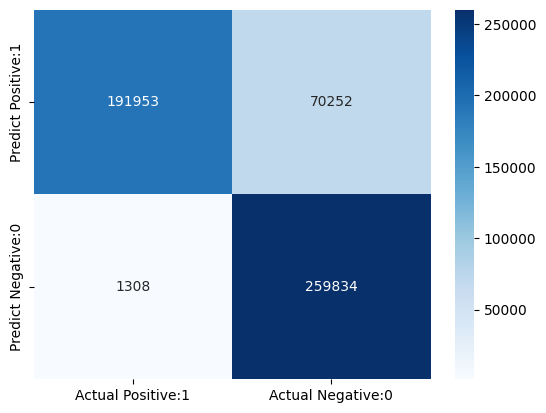

In [132]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
#plt.figure(figsize=(1,1))

### 3.2 Instanciar el modelo (decision tree)

In [136]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [137]:
#Hacemos predicciones
y_pred_en = clf_en.predict(X_test)

<Axes: >

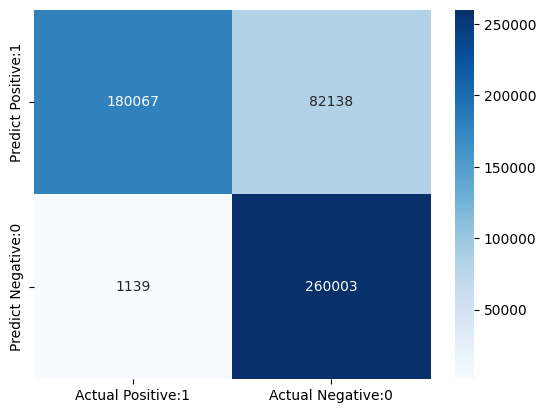

In [138]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
#plt.figure(figsize=(1,1))

[Text(0.5, 0.875, 'addr_state <= 1150.925\nentropy = 1.0\nsamples = 1221140\nvalue = [610763, 610377]'),
 Text(0.25, 0.625, 'term <= 48.0\nentropy = 0.807\nsamples = 802259\nvalue = [198260, 603999]'),
 Text(0.125, 0.375, 'earliest_cr_line <= 0.5\nentropy = 0.918\nsamples = 533194\nvalue = [177409, 355785]'),
 Text(0.0625, 0.125, 'entropy = 0.947\nsamples = 485621\nvalue = [177120, 308501]'),
 Text(0.1875, 0.125, 'entropy = 0.053\nsamples = 47573\nvalue = [289, 47284]'),
 Text(0.375, 0.375, 'emp_length <= 5.595\nentropy = 0.393\nsamples = 269065\nvalue = [20851, 248214]'),
 Text(0.3125, 0.125, 'entropy = 0.288\nsamples = 261359\nvalue = [13169, 248190]'),
 Text(0.4375, 0.125, 'entropy = 0.03\nsamples = 7706\nvalue = [7682, 24]'),
 Text(0.75, 0.625, 'annual_inc <= 14.148\nentropy = 0.114\nsamples = 418881\nvalue = [412503, 6378]'),
 Text(0.625, 0.375, 'addr_state <= 2200.785\nentropy = 0.044\nsamples = 407995\nvalue = [406029, 1966]'),
 Text(0.5625, 0.125, 'entropy = 0.216\nsamples = 41

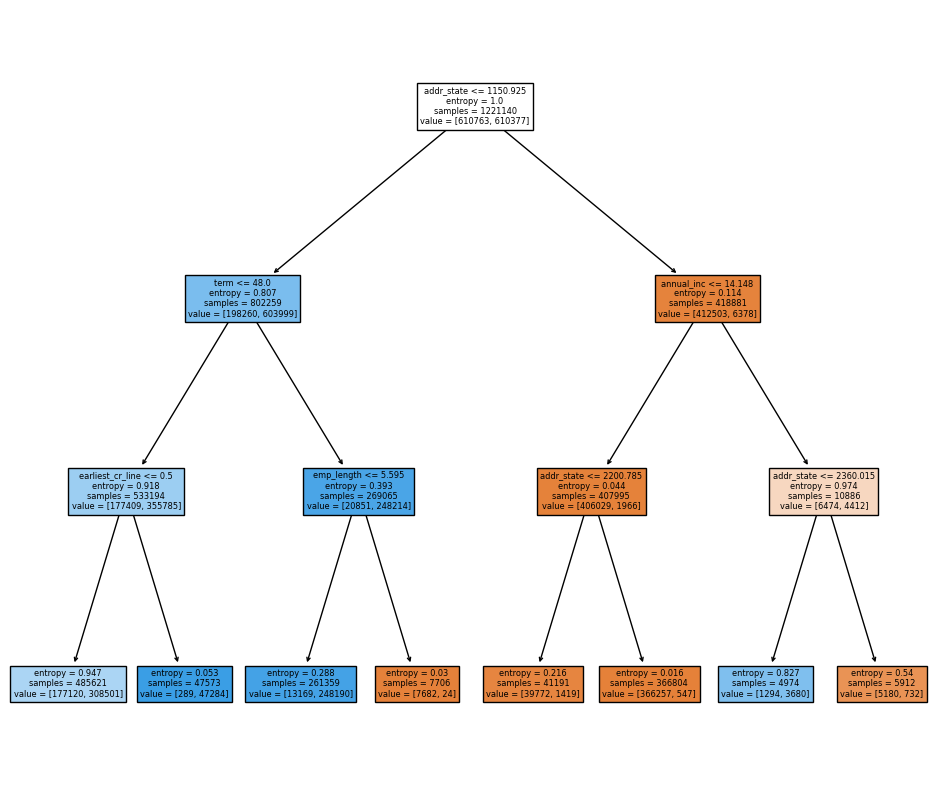

In [139]:
dt_feature_names = list(df_clean.columns)
plt.figure(figsize=(12,10))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train), filled=True, feature_names=dt_feature_names)

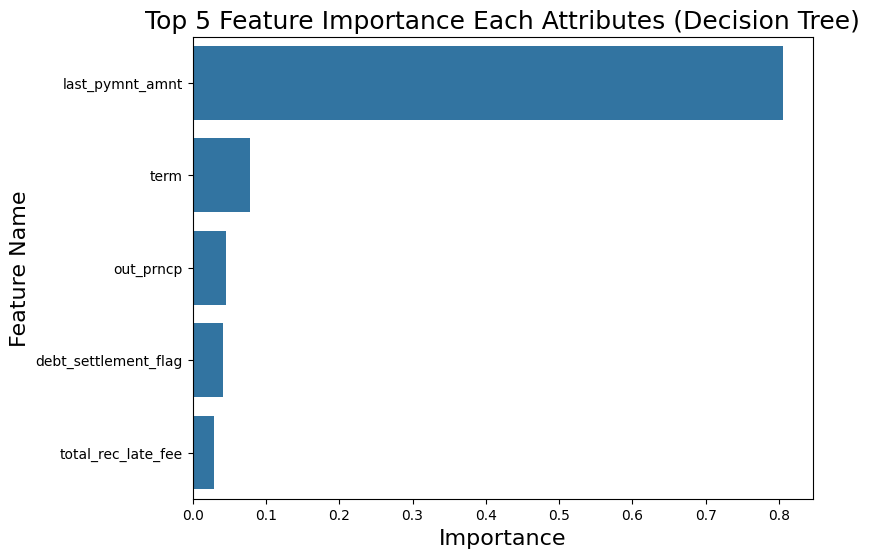

In [140]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": clf_en.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(5)
plt.figure(figsize=(8,6))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 5 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [141]:
#Score más importantes de las características del modelo 
feature_scores = pd.Series(clf_en.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

last_pymnt_amnt         0.805634
term                    0.078710
out_prncp               0.045827
debt_settlement_flag    0.040987
total_rec_late_fee      0.028841
int_rate                0.000000
installment             0.000000
total_rec_int           0.000000
last_pymnt_d            0.000000
last_credit_pull_d      0.000000
dtype: float64

Aunque las últimas 5 variables no agregan valor al modelo, sí suman al accurracy casi 1 punto.

In [142]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
# sacar las probabilidades
y_pred_prob = clf_en.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

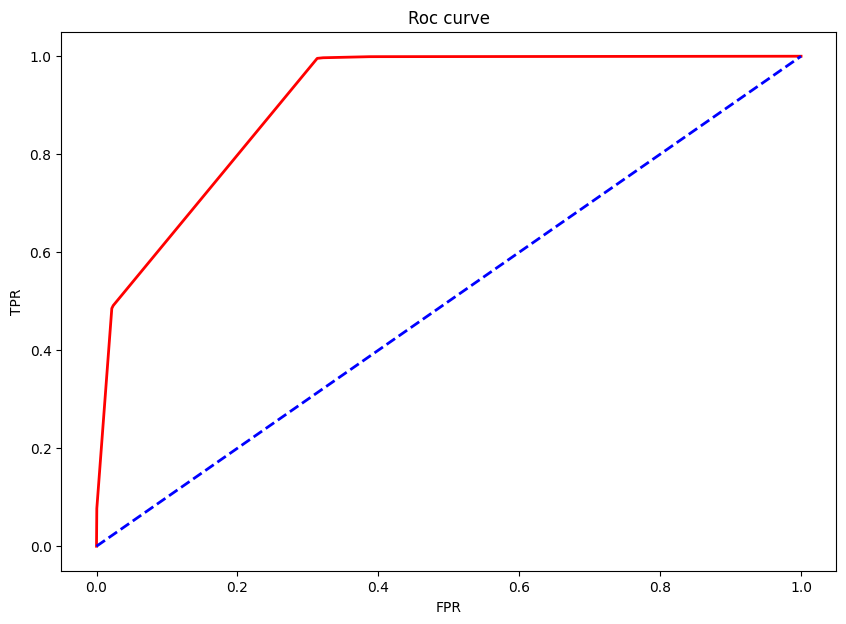

In [143]:
import matplotlib.pyplot as plt 
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

#### Métricas de desempeño

In [144]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(clf_en.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(clf_en.score(X_test, y_test)))

print (classification_report(y_test, y_pred_en))

Precisión en el set de Entrenamiento: 0.84
Precisión en el set de Test: 0.84
              precision    recall  f1-score   support

           0       0.99      0.69      0.81    262205
           1       0.76      1.00      0.86    261142

    accuracy                           0.84    523347
   macro avg       0.88      0.84      0.84    523347
weighted avg       0.88      0.84      0.84    523347



### 3.3 Instanciar el modelo (Random Forest)

In [145]:
from sklearn.ensemble import RandomForestClassifier

# Instanciar el modelo con parámetros por defecto
#rfc = RandomForestClassifier(random_state=0)
rfc = RandomForestClassifier(n_estimators=100,random_state=0)
# Ajustar el modelo al conjunto de entrenamiento
rfc.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba (opcional)
y_pred = rfc.predict(X_test)


<Axes: >

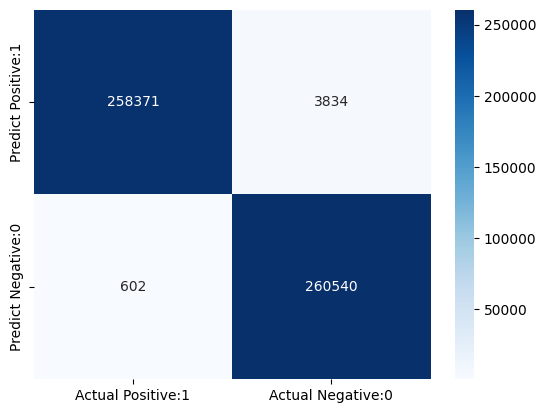

In [146]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
#plt.figure(figsize=(1,1))

#### 3.4. Métricas de desempeño

In [147]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9915


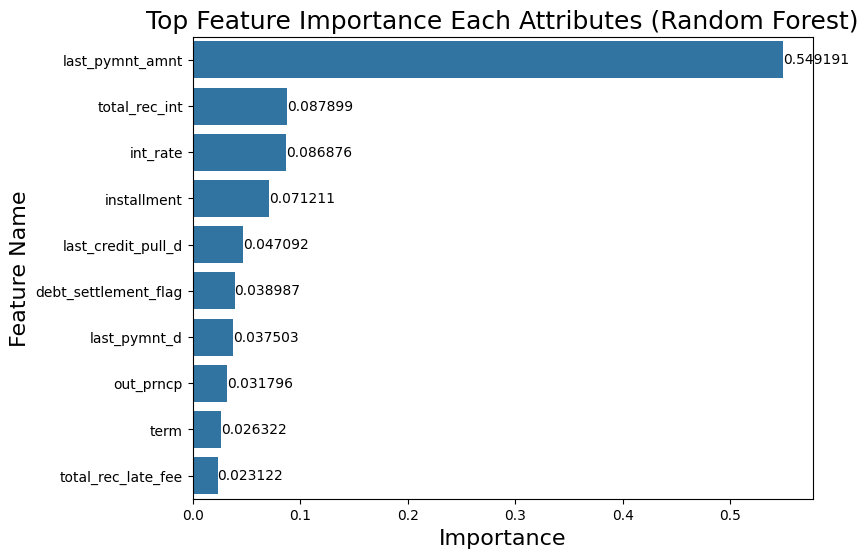

In [148]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(15)
plt.figure(figsize=(8,6))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
# Añadir los valores de importancia a las barras
for index, value in enumerate(fi2['Importance']):
    plt.text(value, index, f'{value:.6f}', color='black', ha="left", va="center")

plt.title('Top Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [149]:
#Score más importantes de las características del modelo 
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

last_pymnt_amnt         0.549191
total_rec_int           0.087899
int_rate                0.086876
installment             0.071211
last_credit_pull_d      0.047092
debt_settlement_flag    0.038987
last_pymnt_d            0.037503
out_prncp               0.031796
term                    0.026322
total_rec_late_fee      0.023122
dtype: float64

In [150]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
# sacar las probabilidades
y_pred_prob2 = rfc.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob2)

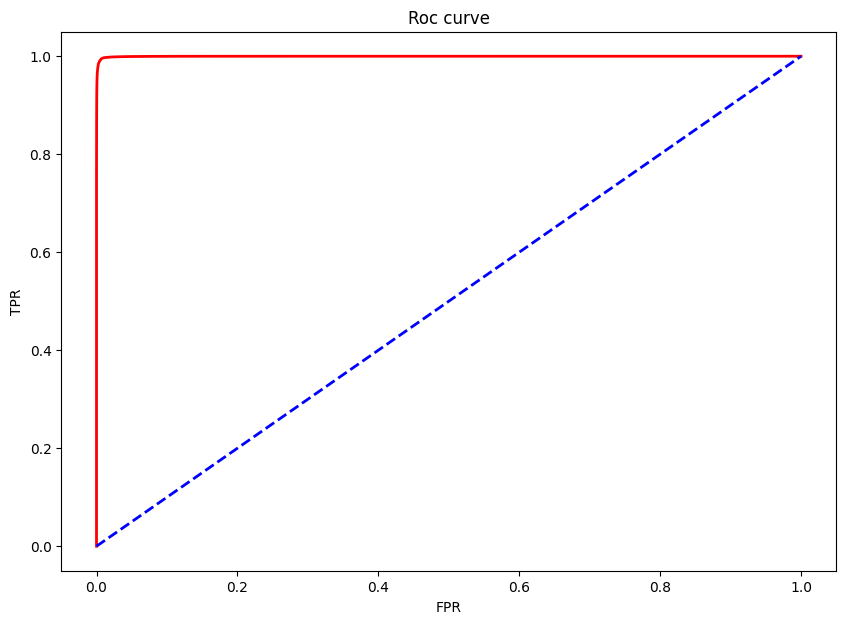

In [151]:
# Curva ROC para el Modelo Radom Forest

import matplotlib.pyplot as plt 
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

### 3.4 Instanciar el modelo (XGBoost)

In [152]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.001)

In [154]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [155]:
y_pred = xgb.predict(X_test)

#### Métricas de desempeño

In [156]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(xgb.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(xgb.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.89
Precisión en el set de Test: 0.89


In [157]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88    262205
           1       0.84      0.96      0.90    261142

    accuracy                           0.89    523347
   macro avg       0.90      0.89      0.89    523347
weighted avg       0.90      0.89      0.89    523347



<Axes: >

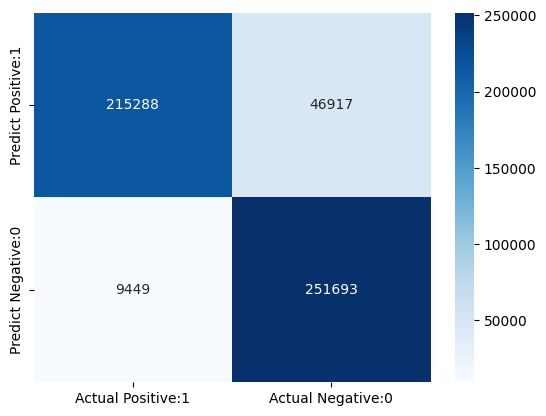

In [158]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
#plt.figure(figsize=(1,1))

## Encontrar los mejores algoritmos para el problema

In [159]:
from sklearn.metrics import accuracy_score,log_loss

Importacion de modelos

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
# crear objetos para todos los algoritmos
lR = LogisticRegression()
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.001)

In [162]:
# Hacer una lista para todos los objetos creados
algos = [lR,rfc_100, clf_en, xgb] #Poly_svc, se quita para revisar los modelos más sencillo
ml_algo = ['Logistic Regs','Random Forest',"DT", 'XGBoost'] #'SVM' se quitó para que no haga ruido por el momento

# Hacer un loop para todos los algoritmos usados en el problema de predicción
for i,j in zip(algos,ml_algo):
    i.fit(X_train,y_train)
    pred = i.predict(X_test)
    print(j,':\n')
    print('Accuracy Score:{:.2f}%'.format(accuracy_score(y_test,pred)*100))
    print('Log Loss:{:.2f}'.format(log_loss(y_test,pred)))
    print('='*40)

Logistic Regs :

Accuracy Score:86.33%
Log Loss:4.93
Random Forest :

Accuracy Score:99.15%
Log Loss:0.31
DT :

Accuracy Score:84.09%
Log Loss:5.74
XGBoost :

Accuracy Score:89.23%
Log Loss:3.88
